**1. Image Classification**
---

The instances were drawn randomly from a database of 7 outdoor images. The images were handsegmented to create a classification for every pixel. 

Each instance is a 3x3 region. <http://archive.ics.uci.edu/ml/datasets/image+segmentation>

In [1]:
### Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

### Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#### Datasets, Metrics and Preprocessing

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.utils.multiclass import unique_labels

In [58]:
# import classiy function from the 'main_functions' notebook
from ipynb.fs.defs.main_functions import classify, plot_confusion

In [3]:
# Defining the classifier that can be used with easy calling names
classifiers = {'Naive Bayes': GaussianNB, 'KNN': KNeighborsClassifier, 'Logistic Regression': LogisticRegression,\
              'RF': RandomForestClassifier, 'SVM': SVC, 'SGD': SGDClassifier, 'AdaBoost': AdaBoostClassifier}

In [4]:
# Reading the dataset and creating the dataframe
image = loadmat('Datasets.mat/Image_segmentation_7classes_2100x19.mat')

df = pd.DataFrame(image.get('X')).drop(2, axis=1)
df['y'] = image.get('y').ravel()

In [5]:
df, df_test = train_test_split(df, test_size=0.2, stratify=df['y'])

In [6]:
len(df)+len(df_test)

2310

# Exploratory Data Analysis (EDA)
This step is to get to know the data and decide what type of preprocessing needs to be done before training the model

In [7]:
df.head()

0      1         3    4         5          6         7         8  \
1801  141.0   31.0  0.000000  0.0  1.444444   0.385183  1.222223  1.185185   
1872  152.0  220.0  0.000000  0.0  0.944445   0.685185  1.444445  2.162964   
1458  201.0  120.0  0.111111  0.0  3.944444  14.774076  3.722222  9.618522   
2085   19.0  147.0  0.000000  0.0  0.222222   0.074074  0.500000  0.077778   
1312   95.0  109.0  0.000000  0.0  1.000000   0.488889  1.944444  2.729629   

               9          10          11          12         13         14  \
1801  126.814810  117.111115  141.222230  122.111115 -29.111110  43.222220   
1872   14.629630   11.555555   13.111111   19.222221  -9.222222  -4.555555   
1458    3.740741    1.444444    7.666666    2.111111  -6.888889  11.777778   
2085    4.148148    3.888889    6.666666    1.888889  -0.777778   7.555555   
1312   17.259260   19.222221   20.000000   12.555555   5.888889   8.222222   

             15          16        17        18  y  
1801 -14.111111  141.222230  0.170718 -2.310766  2  
1872  13.777778   19.222221  0.416705  2.306884  7  
1458  -4.888889    7.666666  0.893054 -2.180291  3  
2085  -6.777778    7.000000  0.713228 -1.475643  1  
1312 -14.111111   20.444445  0.384997 -1.131204  1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 1801 to 1444
Data columns (total 19 columns):
0     1848 non-null float64
1     1848 non-null float64
3     1848 non-null float64
4     1848 non-null float64
5     1848 non-null float64
6     1848 non-null float64
7     1848 non-null float64
8     1848 non-null float64
9     1848 non-null float64
10    1848 non-null float64
11    1848 non-null float64
12    1848 non-null float64
13    1848 non-null float64
14    1848 non-null float64
15    1848 non-null float64
16    1848 non-null float64
17    1848 non-null float64
18    1848 non-null float64
y     1848 non-null uint8
dtypes: float64(18), uint8(1)
memory usage: 276.1 KB


In [9]:
df.describe()

0            1            3            4            5  \
count  1848.000000  1848.000000  1848.000000  1848.000000  1848.000000   
mean    124.835498   123.375000     0.015031     0.004690     1.875631   
std      73.077430    57.669912     0.041381     0.024074     2.591370   
min       1.000000    11.000000     0.000000     0.000000     0.000000   
25%      60.000000    81.750000     0.000000     0.000000     0.722222   
50%     122.000000   121.000000     0.000000     0.000000     1.277777   
75%     189.000000   169.250000     0.000000     0.000000     2.166667   
max     254.000000   251.000000     0.333333     0.222222    29.222221   

                 6            7            8            9           10  \
count  1848.000000  1848.000000  1848.000000  1848.000000  1848.000000   
mean      5.209835     2.372745     7.029931    37.019280    32.851130   
std      41.742488     3.373961    43.613854    38.409188    35.329469   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.355558     0.777779     0.421637     7.101852     6.888889   
50%       0.833333     1.444444     0.962963    21.444445    19.444445   
75%       1.806367     2.555556     2.162966    52.824075    47.111110   
max     991.718400    43.333332  1039.540800   143.444440   137.111110   

                11           12           13           14           15  \
count  1848.000000  1848.000000  1848.000000  1848.000000  1848.000000   
mean     44.085498    34.121212   -12.504449    21.198653    -8.694204   
std      43.670083    36.625165    11.428659    19.369041    11.484921   
min       0.000000     0.000000   -49.666668   -12.444445   -33.888890   
25%       9.527778     5.888889   -18.111110     4.444445   -16.777779   
50%      27.277777    20.166666   -10.666667    19.333334   -10.666667   
75%      64.694447    46.222220    -4.333334    35.444443    -3.222222   
max     150.888890   142.555560     9.888889    82.000000    22.222221   

                16           17           18            y  
count  1848.000000  1848.000000  1848.000000  1848.000000  
mean     45.024772     0.429523    -1.368768     4.000000  
std      43.074844     0.231182     1.543653     2.000541  
min       0.000000     0.000000    -3.044175     1.000000  
25%      11.527778     0.284510    -2.187993     2.000000  
50%      28.444445     0.376138    -2.052499     4.000000  
75%      64.694447     0.545635    -1.570254     6.000000  
max     150.888890     1.000000     2.875120     7.000000

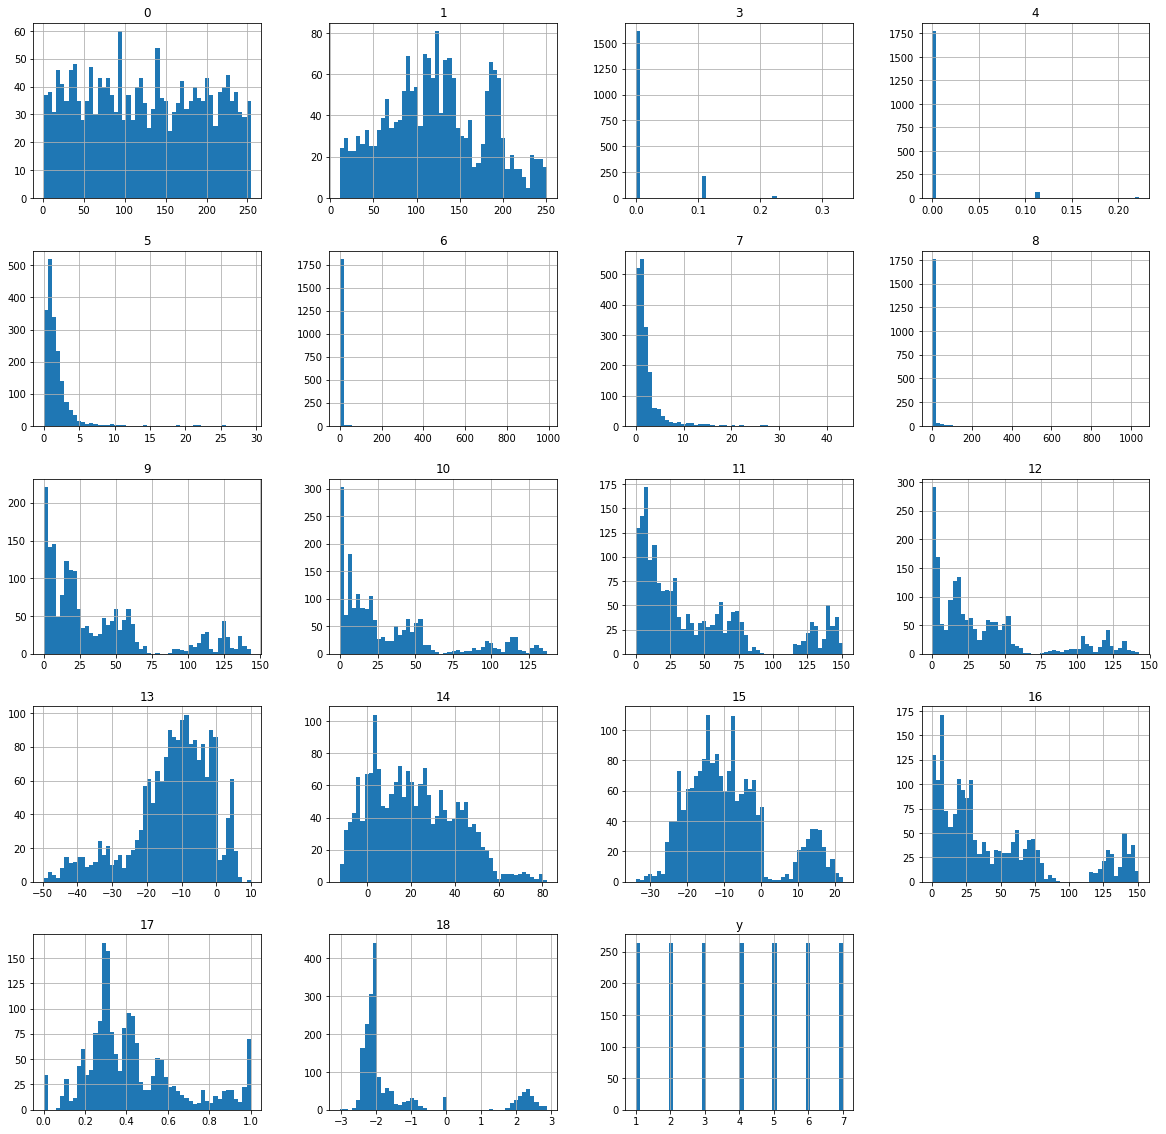

In [10]:
df.hist(bins= 50, figsize=(20,20))
plt.show()

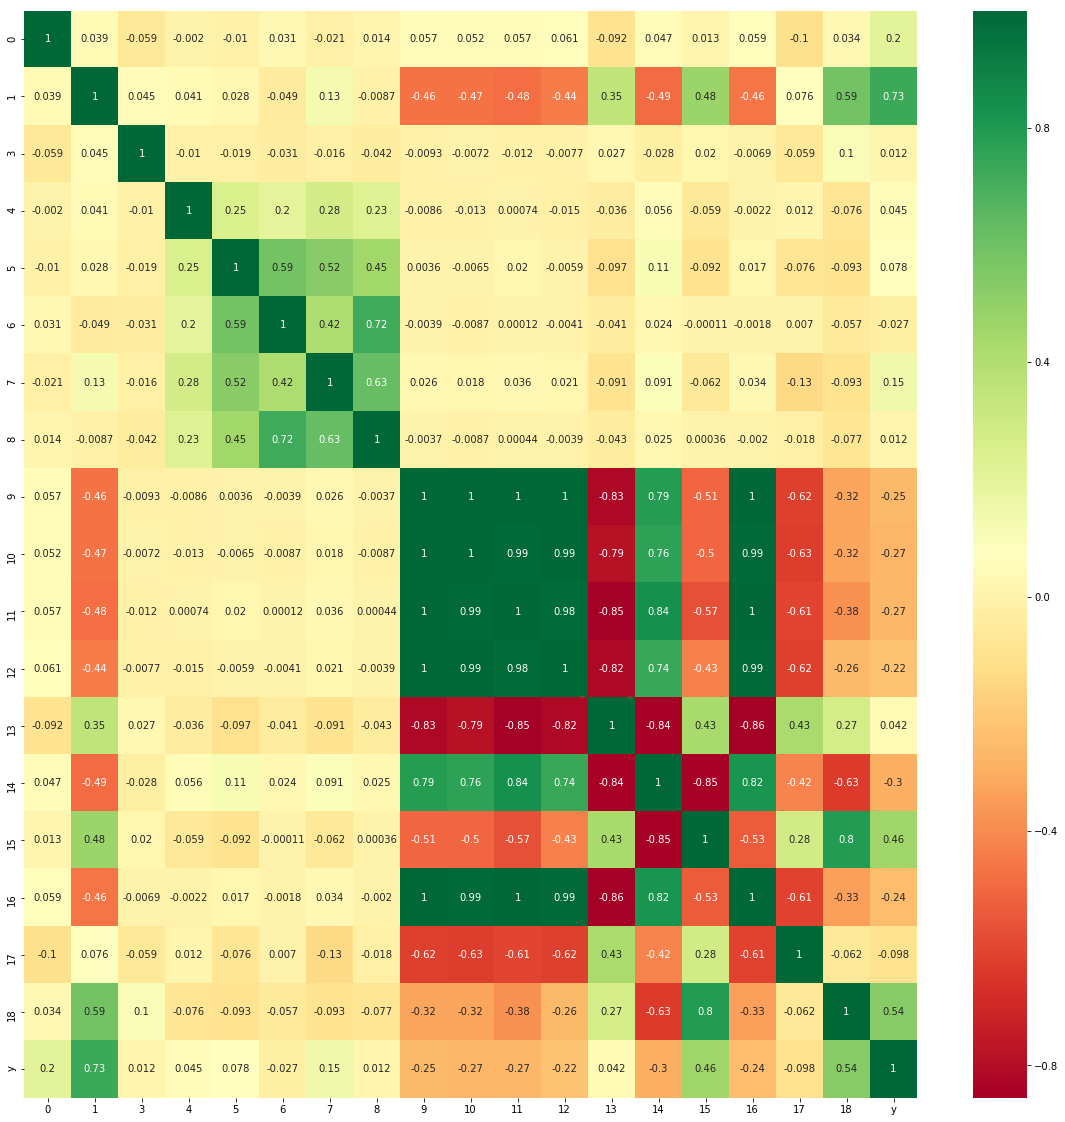

In [11]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
# top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [12]:
corrmat['y'].sort_values(ascending=True)

14   -0.296284
10   -0.271499
11   -0.267113
9    -0.253895
16   -0.241074
12   -0.218402
17   -0.097842
6    -0.027322
8     0.011642
3     0.012354
13    0.042001
4     0.044967
5     0.077899
7     0.149678
0     0.203314
15    0.457881
18    0.536109
1     0.730807
y     1.000000
Name: y, dtype: float64

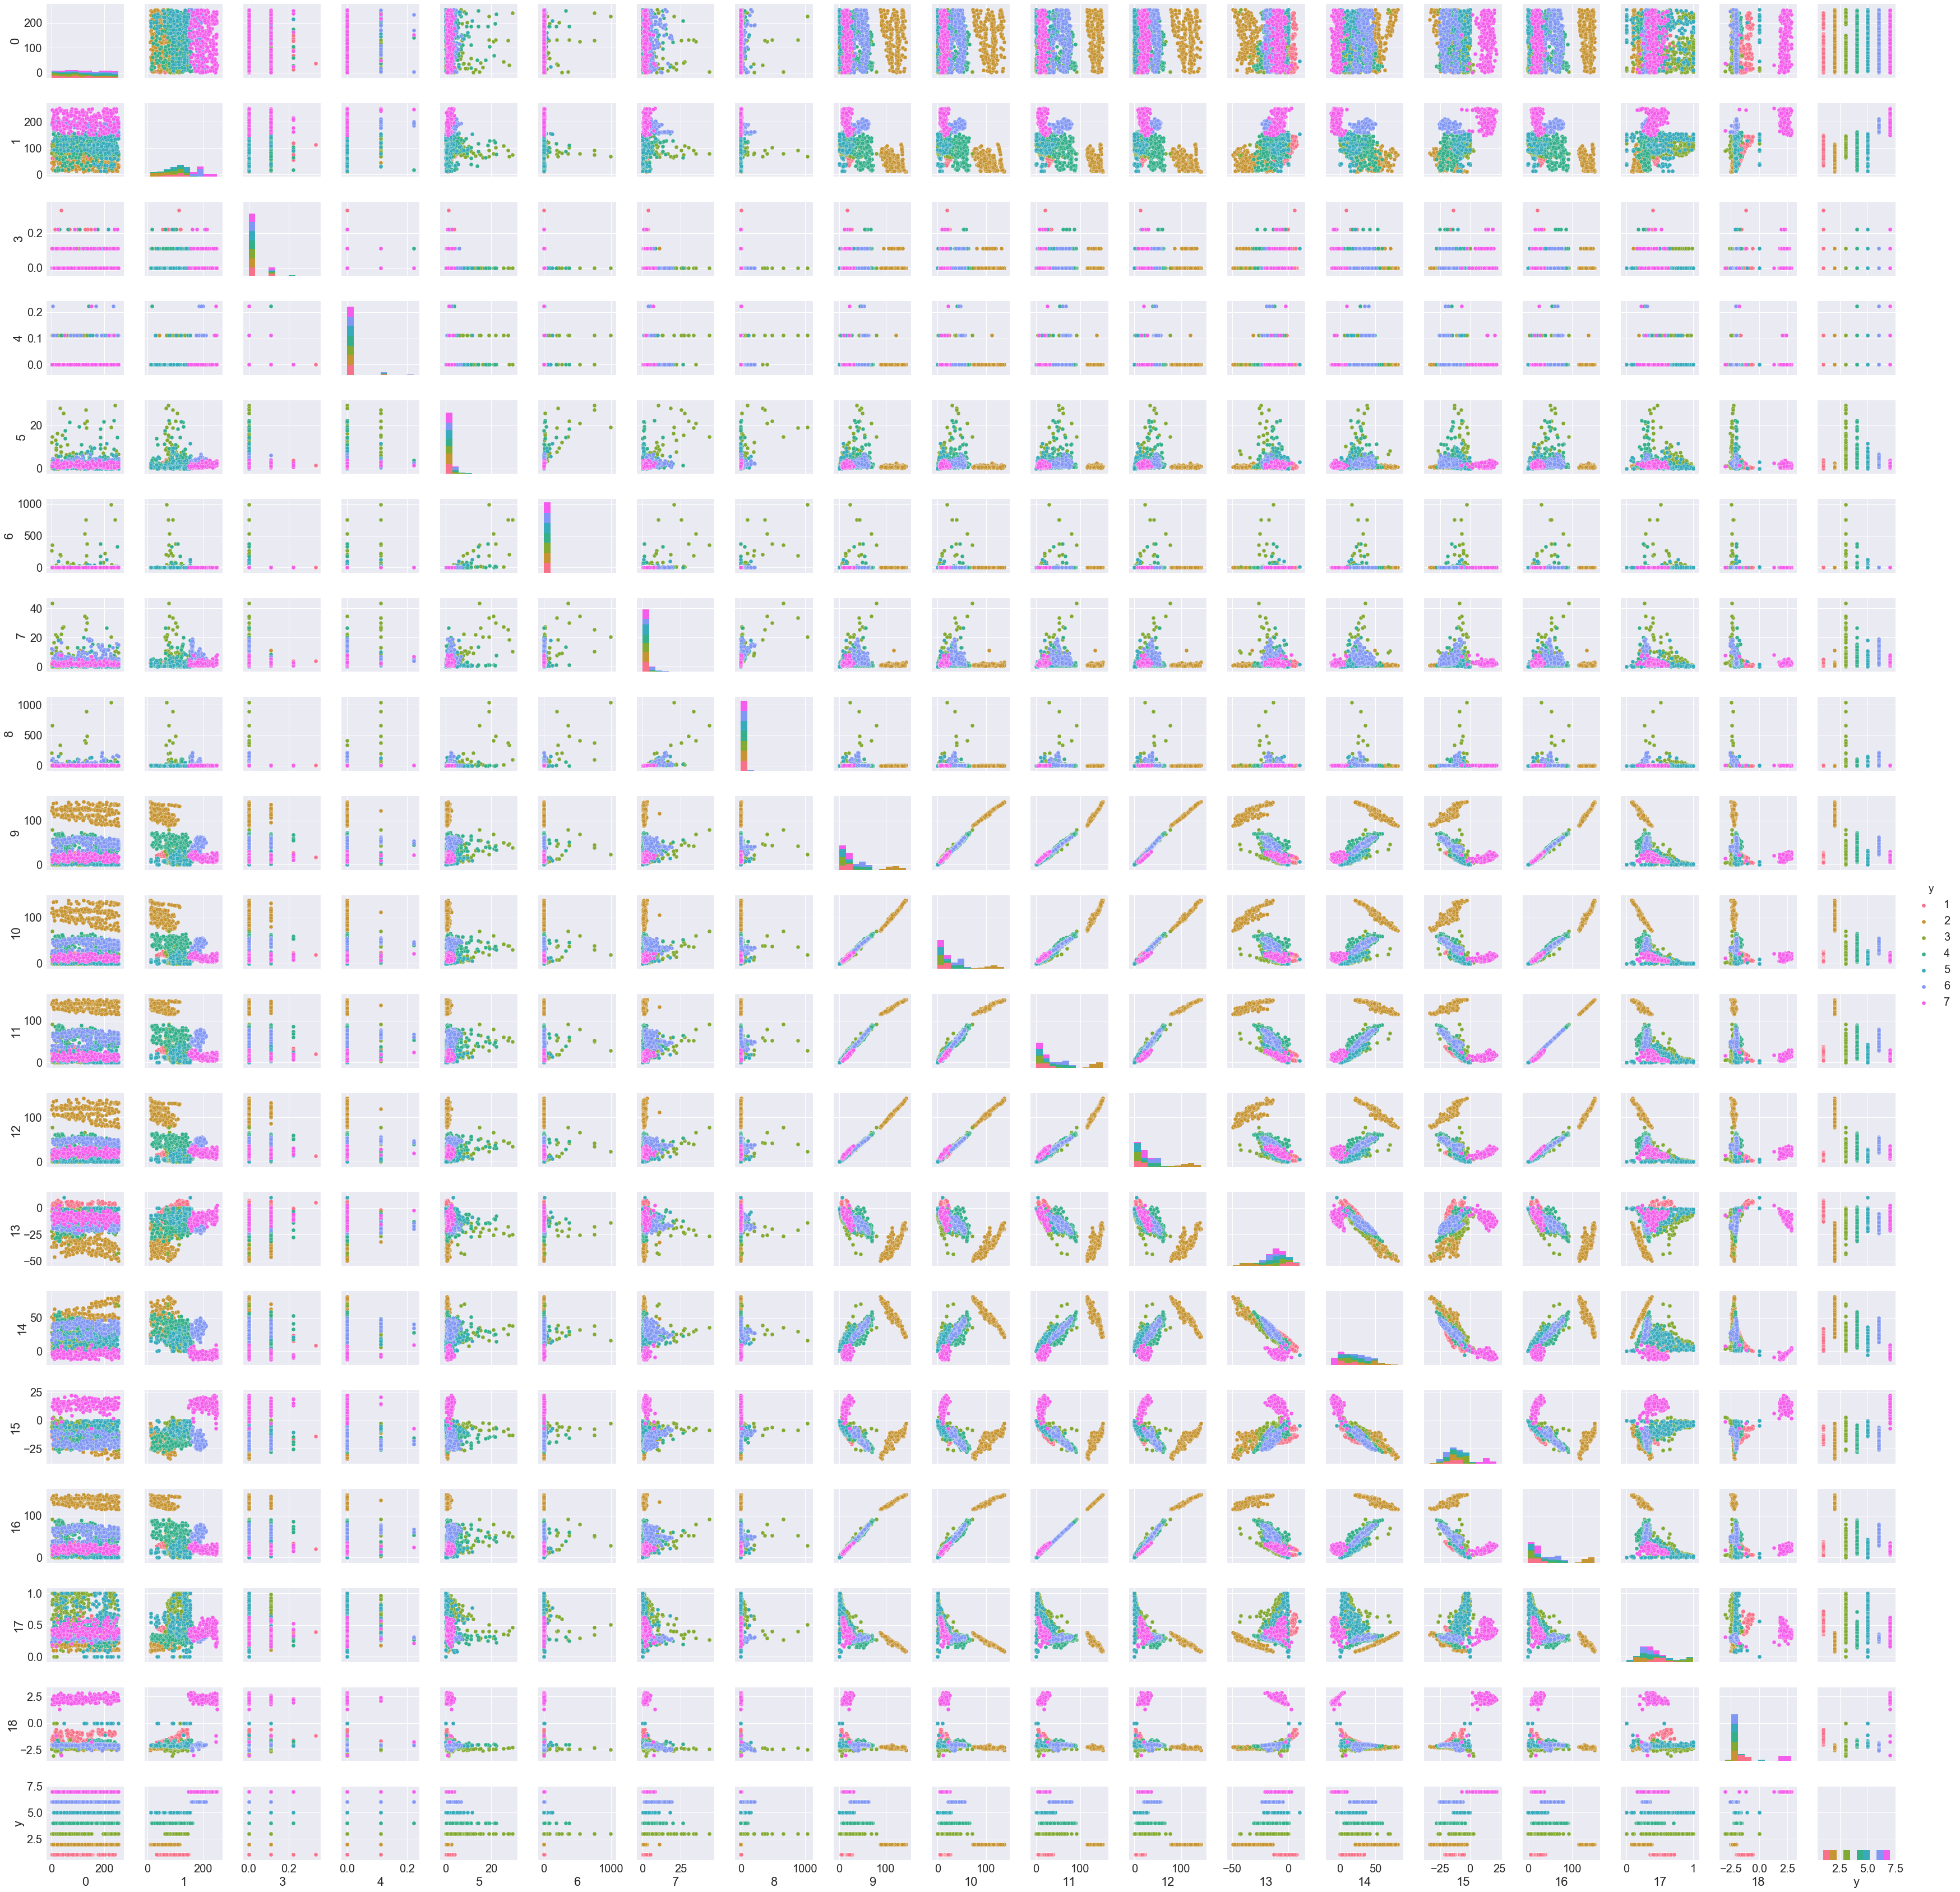

In [13]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(df, hue='y')

In [14]:
df['y'].value_counts()
df['y'].value_counts()/df['y'].value_counts().sum()
# print(ratio)

7    0.142857
6    0.142857
5    0.142857
4    0.142857
3    0.142857
2    0.142857
1    0.142857
Name: y, dtype: float64

# Preprocessing

**In this dataset:** <br>
- No categorical attributes exists <br>
- I did not consider it as imbalanced since the ratio is almost 2:3
- Scaling will be applied

In [15]:
scaler = MinMaxScaler()
df_features = df.drop('y',axis=1)
cancer_prepared = scaler.fit_transform(df_features)

# 1. Naive Bayes

In [16]:
sns.set(font_scale=1)
sns.set_style('ticks')

The model score is 0.800 (+/- 0.019)
The IQR is 0.033 between [0.79,0.82]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.76      0.95      0.84      2640
         2.0       1.00      0.99      1.00      2640
         3.0       0.71      0.17      0.28      2640
         4.0       0.83      0.84      0.84      2640
         5.0       0.45      0.69      0.55      2640
         6.0       0.97      0.97      0.97      2640
         7.0       1.00      0.98      0.99      2640

    accuracy                           0.80     18480
   macro avg       0.82      0.80      0.78     18480
weighted avg       0.82      0.80      0.78     18480

The average training time is 0.002673 seconds


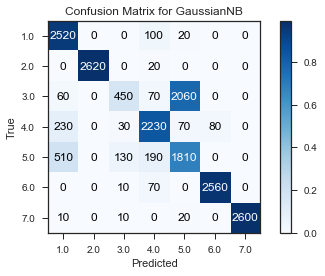

In [17]:
val_conf_NB, val_scores_NB, val_time_NB = classify(df.drop('y',axis=1), df['y'], classifiers['Naive Bayes']())
print('The average training time is %0.6f seconds'%val_time_NB.mean())

The test accuracy is 0.81
              precision    recall  f1-score   support

           1       1.00      0.80      0.89        83
           2       0.98      1.00      0.99        65
           3       0.21      0.70      0.33        20
           4       0.88      0.84      0.86        69
           5       0.67      0.46      0.55        95
           6       0.98      0.98      0.98        66
           7       0.97      1.00      0.98        64

    accuracy                           0.81       462
   macro avg       0.81      0.83      0.80       462
weighted avg       0.87      0.81      0.83       462



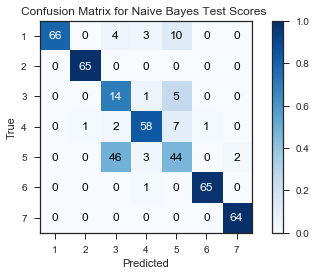

In [18]:
#  Fitting on the training data
NB = classifiers['Naive Bayes']()
NB.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = NB.predict(df_test.drop('y',axis=1))
test_score_NB = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_NB)
print(classification_report(test_pred, df_test['y']))
_,test_conf_NB = plot_confusion(test_pred, df_test['y'],'Naive Bayes Test Scores ()')

# 2. Logistic Regression

The model score is 0.888 (+/- 0.023)
The IQR is 0.045 between [0.87,0.92]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.75      0.86      0.80      2640
         4.0       0.93      0.73      0.82      2640
         5.0       0.76      0.70      0.73      2640
         6.0       0.85      1.00      0.92      2640
         7.0       1.00      0.99      0.99      2640

    accuracy                           0.89     18480
   macro avg       0.89      0.89      0.89     18480
weighted avg       0.89      0.89      0.89     18480

The average training time is 0.025640 seconds


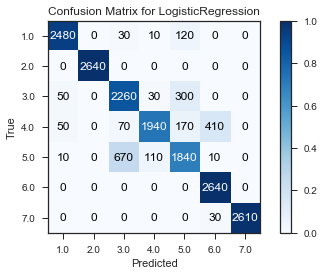

In [19]:
val_conf_LR, val_scores_LR, val_time_LR = classify(cancer_prepared, np.array(df['y']),
                                              classifiers['Logistic Regression'](solver='liblinear',
                                                                                 multi_class = 'ovr'))
print('The average training time is %0.6f seconds'%val_time_LR.mean())

In [20]:
scaled_test = scaler.transform(df_test.drop('y',axis=1))

The test accuracy is 0.90
              precision    recall  f1-score   support

           1       0.95      0.97      0.96        65
           2       1.00      1.00      1.00        66
           3       0.79      0.72      0.75        72
           4       0.82      0.95      0.88        57
           5       0.74      0.75      0.75        65
           6       1.00      0.93      0.96        71
           7       1.00      1.00      1.00        66

    accuracy                           0.90       462
   macro avg       0.90      0.90      0.90       462
weighted avg       0.90      0.90      0.90       462



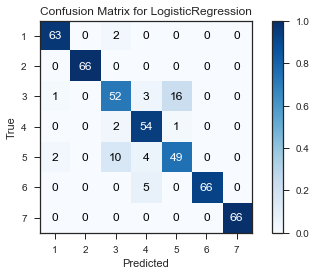

In [21]:
#  Fitting on the training data
LR = classifiers['Logistic Regression'](solver='liblinear',  multi_class = 'ovr')
LR.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = LR.predict(scaled_test)
test_score_LR = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_LR)
print(classification_report(test_pred, df_test['y']))
_,test_conf_LR = plot_confusion(test_pred, df_test['y'],LR)

# 3. Ensemble - Random Forests

n_estimators=500

The model score is 0.973 (+/- 0.013)
The IQR is 0.022 between [0.96,0.98]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.95      0.96      0.95      2640
         4.0       0.95      0.96      0.95      2640
         5.0       0.94      0.92      0.93      2640
         6.0       0.99      1.00      0.99      2640
         7.0       1.00      0.99      0.99      2640

    accuracy                           0.97     18480
   macro avg       0.97      0.97      0.97     18480
weighted avg       0.97      0.97      0.97     18480

The average training time is 0.807281 seconds


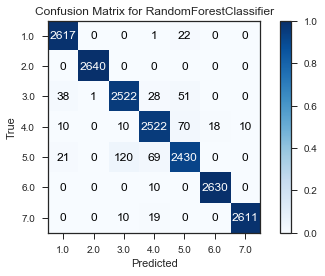

In [22]:
val_conf_RF, val_scores_RF, val_time_RF = classify(df.drop('y',axis=1), df['y'],
                                                   classifiers['RF'](n_estimators = 500, n_jobs=-1))
print('The average training time is %0.6f seconds'%val_time_RF.mean())

The test accuracy is 0.98
              precision    recall  f1-score   support

           1       1.00      0.99      0.99        67
           2       1.00      1.00      1.00        66
           3       0.98      0.94      0.96        69
           4       0.98      1.00      0.99        65
           5       0.92      0.97      0.95        63
           6       1.00      1.00      1.00        66
           7       1.00      1.00      1.00        66

    accuracy                           0.98       462
   macro avg       0.98      0.99      0.98       462
weighted avg       0.99      0.98      0.98       462



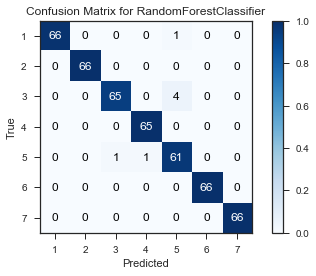

In [23]:
#  Fitting on the training data
RF = classifiers['RF'](n_estimators = 500, n_jobs=-1)
RF.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = RF.predict(df_test.drop('y',axis=1))
test_score_RF = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_RF)
print(classification_report(test_pred, df_test['y']))
_,test_conf_RF = plot_confusion(test_pred, df_test['y'],RF)

# 4. Ensemble - AdaBoost

The model score is 0.553 (+/- 0.043)
The IQR is 0.011 between [0.56,0.57]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.24      0.87      0.38      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.25      0.09      0.13      2640
         4.0       0.00      0.00      0.00      2640
         5.0       0.24      0.04      0.07      2640
         6.0       0.96      0.89      0.92      2640
         7.0       1.00      0.98      0.99      2640

    accuracy                           0.55     18480
   macro avg       0.53      0.55      0.50     18480
weighted avg       0.53      0.55      0.50     18480

The average training time is 0.717835 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


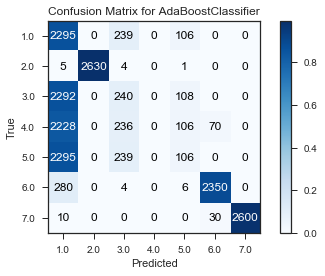

In [24]:
val_conf_Ada, val_scores_Ada, val_time_Ada = classify(df.drop('y',axis=1), np.array(df['y']),
                                                      classifiers['AdaBoost'](n_estimators=200))
print('The average training time is %0.6f seconds'%val_time_Ada.mean())

The test accuracy is 0.57
              precision    recall  f1-score   support

           1       1.00      0.25      0.40       264
           2       0.98      1.00      0.99        65
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       1.00      0.99      0.99        67
           7       1.00      1.00      1.00        66

    accuracy                           0.57       462
   macro avg       0.57      0.46      0.48       462
weighted avg       1.00      0.57      0.65       462



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
ipynb.fs.defs.main_functions:40: RuntimeWarning: invalid value encountered in true_divide


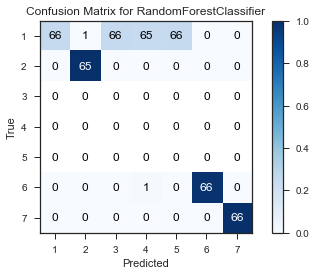

In [25]:
#  Fitting on the training data
Ada = classifiers['AdaBoost'](n_estimators = 200)
Ada.fit(df.drop('y',axis=1), np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = Ada.predict(df_test.drop('y',axis=1))
test_score_Ada = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.2f'%test_score_Ada)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_Ada = plot_confusion(test_pred, df_test['y'],RF)

# 5. K-Nearest Neighbours

In [26]:
np.shape(df['y'])

(1848,)

The model score is 0.962 (+/- 0.014)
The IQR is 0.020 between [0.95,0.97]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.92      0.95      0.93      2640
         4.0       0.94      0.94      0.94      2640
         5.0       0.90      0.88      0.89      2640
         6.0       0.99      1.00      1.00      2640
         7.0       1.00      0.99      0.99      2640

    accuracy                           0.96     18480
   macro avg       0.96      0.96      0.96     18480
weighted avg       0.96      0.96      0.96     18480

The model score is 0.957 (+/- 0.012)
The IQR is 0.016 between [0.95,0.97]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.88      0.97      0.93 

The model score is 0.939 (+/- 0.019)
The IQR is 0.022 between [0.93,0.95]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.88      0.91      0.89      2640
         4.0       0.96      0.85      0.90      2640
         5.0       0.84      0.84      0.84      2640
         6.0       0.95      1.00      0.97      2640
         7.0       1.00      0.99      0.99      2640

    accuracy                           0.94     18480
   macro avg       0.94      0.94      0.94     18480
weighted avg       0.94      0.94      0.94     18480

The model score is 0.939 (+/- 0.016)
The IQR is 0.025 between [0.93,0.95]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.87      0.90      0.88 

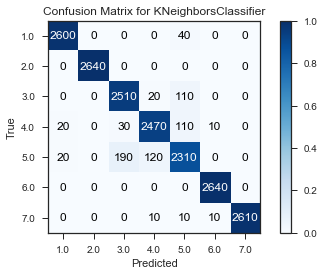

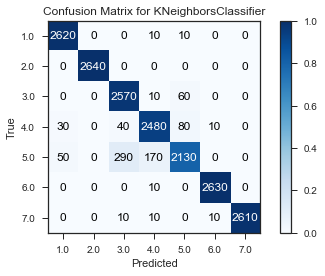

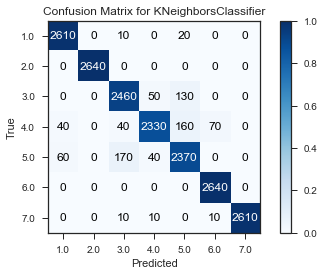

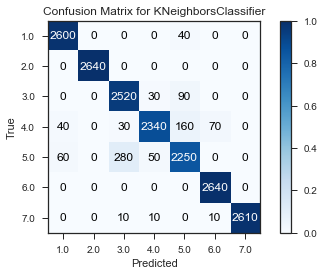

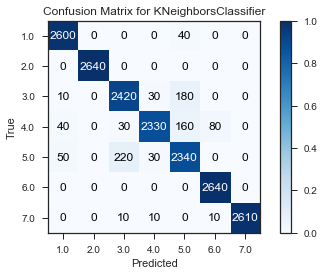

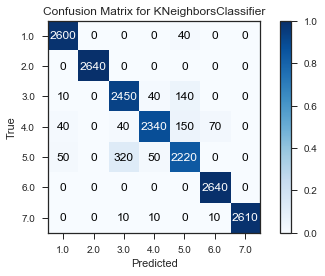

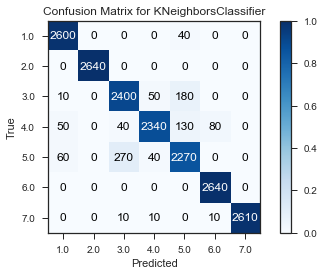

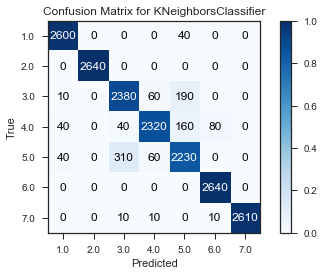

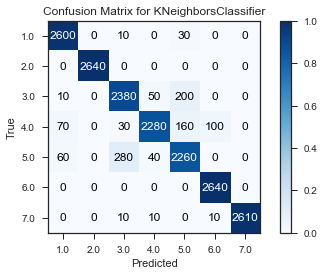

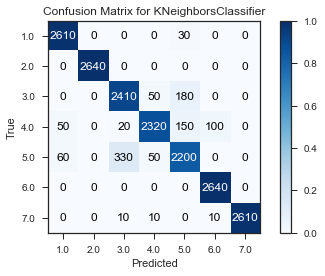

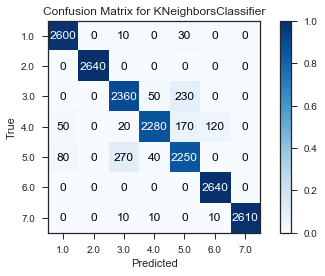

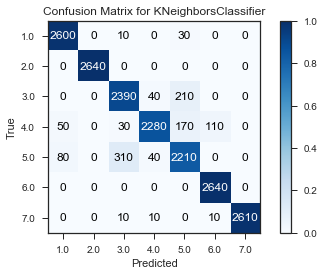

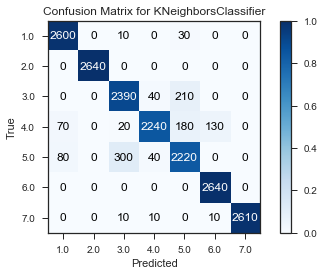

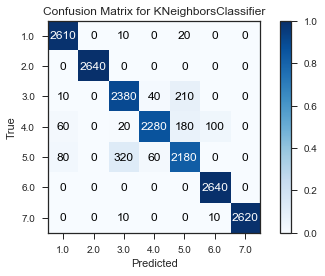

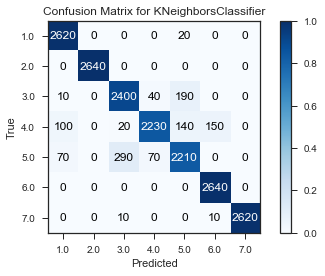

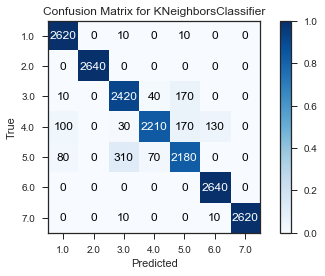

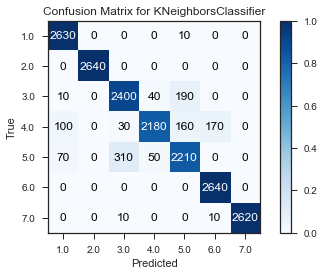

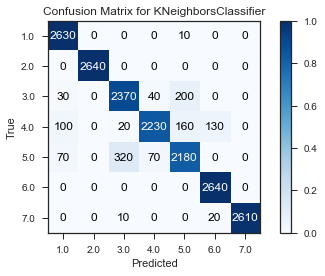

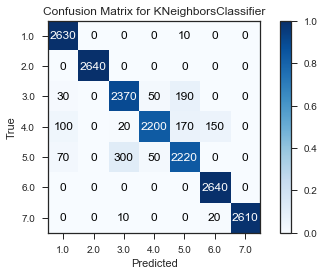

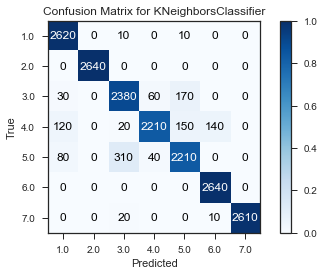

In [27]:
KNN_scores = []
for k in range(1,21):
    _, val_scores_KNN, _= classify(cancer_prepared, np.array(df['y']),classifiers['KNN'](k))
    KNN_scores.append(np.round(val_scores_KNN.mean(),4))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

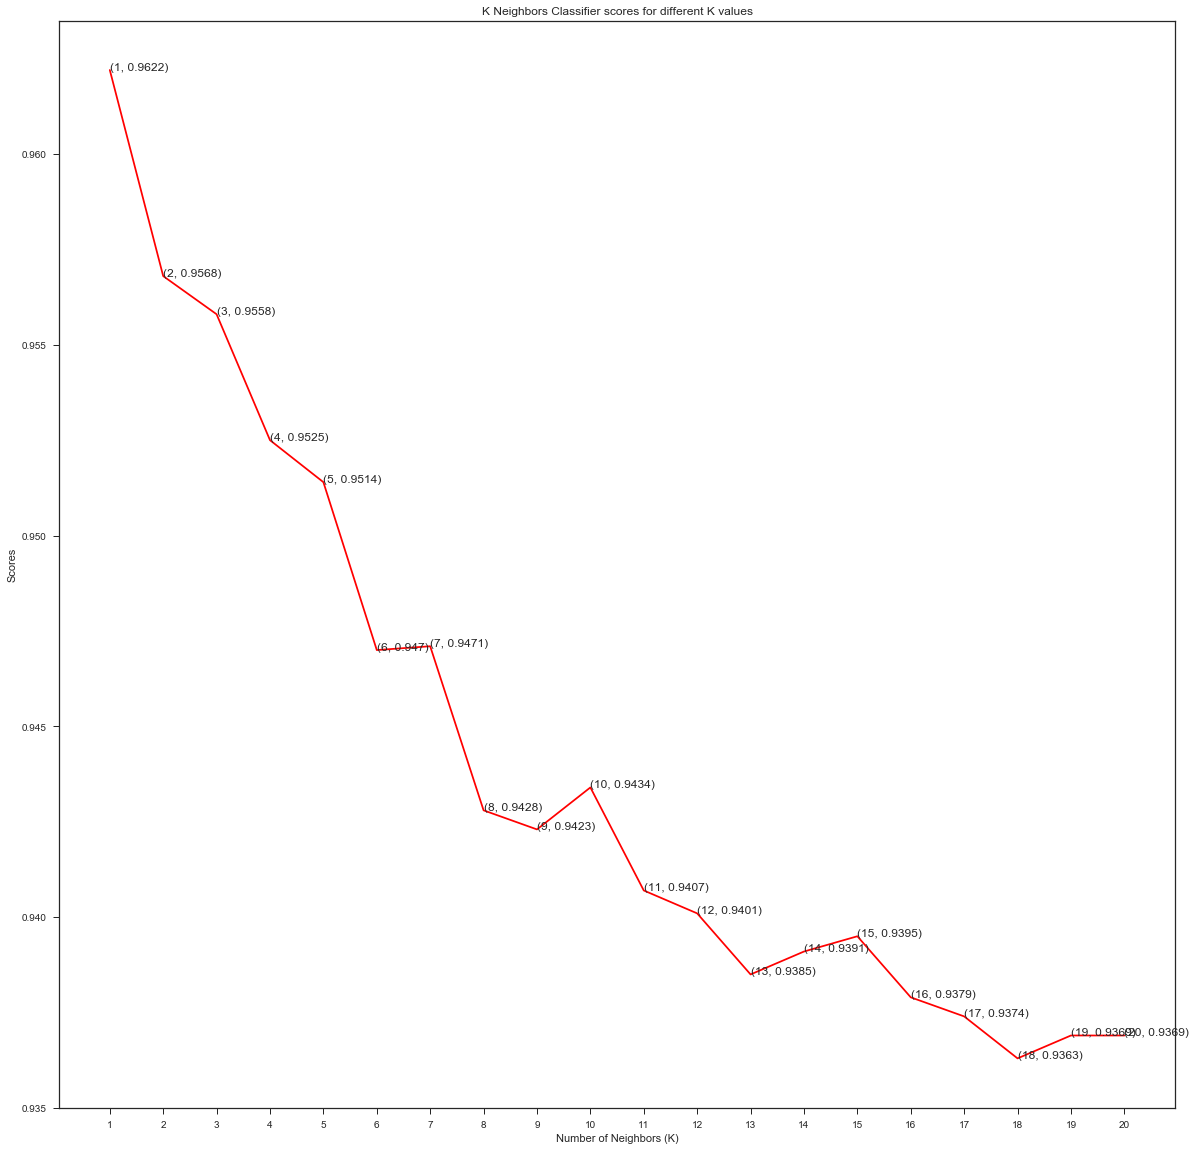

In [28]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1, 21)], KNN_scores, color = 'red')
for i in range(1,21):
    plt.text(i, KNN_scores[i-1], (i, KNN_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

The model score is 0.962 (+/- 0.014)
The IQR is 0.020 between [0.95,0.97]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.92      0.95      0.93      2640
         4.0       0.94      0.94      0.94      2640
         5.0       0.90      0.88      0.89      2640
         6.0       0.99      1.00      1.00      2640
         7.0       1.00      0.99      0.99      2640

    accuracy                           0.96     18480
   macro avg       0.96      0.96      0.96     18480
weighted avg       0.96      0.96      0.96     18480

The average training time is 0.002903 seconds


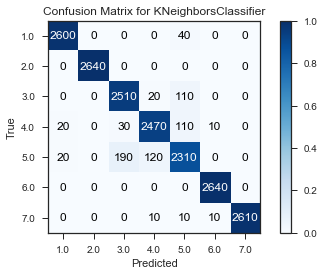

In [29]:
val_conf_KNN, val_scores_KNN, val_time_KNN = classify(cancer_prepared, np.array(df['y']),
                                                      classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1))
print('The average training time is %0.6f seconds'%val_time_KNN.mean())

The test accuracy is 0.9675
              precision    recall  f1-score   support

           1       1.00      0.99      0.99        67
           2       1.00      1.00      1.00        66
           3       0.94      0.91      0.93        68
           4       0.97      0.94      0.96        68
           5       0.86      0.95      0.90        60
           6       1.00      0.99      0.99        67
           7       1.00      1.00      1.00        66

    accuracy                           0.97       462
   macro avg       0.97      0.97      0.97       462
weighted avg       0.97      0.97      0.97       462



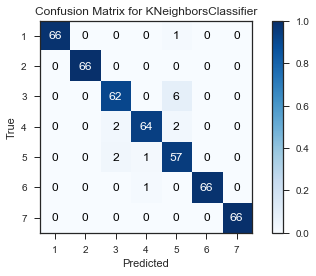

In [30]:
#  Fitting on the training data
KNN = classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1)
KNN.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = KNN.predict(scaled_test)
test_score_KNN = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_KNN)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_KNN = plot_confusion(test_pred, df_test['y'],KNN)

# 6. Support Vector Machines - Linear Kernel

In [31]:
from time import time

In [32]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21)}
]

clf = SVC(kernel='linear')
start = time()
grid_search_L = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid_search_L.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 12.710055 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The model score is 0.960 (+/- 0.015)
The IQR is 0.018 between [0.95,0.97]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.91      0.92      0.92      2640
         4.0       0.96      0.93      0.95      2640
         5.0       0.87      0.89      0.88      2640
         6.0       0.99      1.00      0.99      2640
         7.0       1.00      0.99      0.99      2640

    accuracy                           0.96     18480
   macro avg       0.96      0.96      0.96     18480
weighted avg       0.96      0.96      0.96     18480

The average training time is 0.023957 seconds


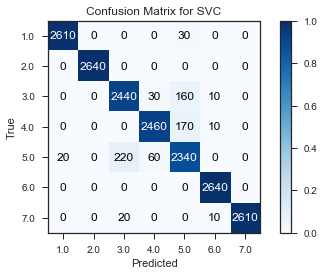

In [33]:
val_conf_SVM_L_opt, val_scores_SVM_L_opt, val_time_SVM_L = classify(cancer_prepared, np.array(df['y']),
                                                 classifiers['SVM'](kernel='linear', C=grid_search_L.best_params_['C']))

print('The average training time is %0.6f seconds'%val_time_SVM_L.mean())

In [34]:
cvres = grid_search_L.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8203463203463204 {'C': 0.03125}
0.8528138528138528 {'C': 0.0625}
0.8766233766233766 {'C': 0.125}
0.9015151515151515 {'C': 0.25}
0.9193722943722944 {'C': 0.5}
0.926948051948052 {'C': 1.0}
0.9329004329004329 {'C': 2.0}
0.9388528138528138 {'C': 4.0}
0.9415584415584416 {'C': 8.0}
0.9502164502164502 {'C': 16.0}
0.9556277056277056 {'C': 32.0}
0.95995670995671 {'C': 64.0}
0.9594155844155844 {'C': 128.0}
0.9561688311688312 {'C': 256.0}
0.9556277056277056 {'C': 512.0}
0.9561688311688312 {'C': 1024.0}
0.9577922077922078 {'C': 2048.0}
0.9583333333333334 {'C': 4096.0}
0.9594155844155844 {'C': 8192.0}
0.9588744588744589 {'C': 16384.0}
0.9577922077922078 {'C': 32768.0}


The test accuracy is 0.9545
              precision    recall  f1-score   support

           1       0.98      1.00      0.99        65
           2       1.00      1.00      1.00        66
           3       0.88      0.91      0.89        64
           4       0.92      0.97      0.95        63
           5       0.89      0.82      0.86        72
           6       1.00      1.00      1.00        66
           7       1.00      1.00      1.00        66

    accuracy                           0.95       462
   macro avg       0.95      0.96      0.96       462
weighted avg       0.95      0.95      0.95       462



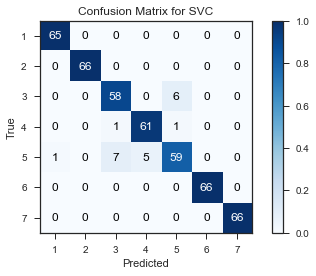

In [35]:
#  Fitting on the training data
SVM_L = classifiers['SVM'](kernel='linear', 
                           C=grid_search_L.best_params_['C'])
SVM_L.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_L.predict(scaled_test)
test_score_SVM_L = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_L)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_L)

# 7. Support Vector Machines - RBF Kernel

In [36]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='rbf')

start = time()
grid_search_RBF = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid_search_RBF.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 133.538669 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The model score is 0.972 (+/- 0.013)
The IQR is 0.010 between [0.97,0.98]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       1.00      0.99      0.99      2640
         2.0       1.00      1.00      1.00      2640
         3.0       0.92      0.95      0.94      2640
         4.0       0.97      0.96      0.96      2640
         5.0       0.92      0.90      0.91      2640
         6.0       1.00      1.00      1.00      2640
         7.0       1.00      1.00      1.00      2640

    accuracy                           0.97     18480
   macro avg       0.97      0.97      0.97     18480
weighted avg       0.97      0.97      0.97     18480

The average training time is 0.025432 seconds


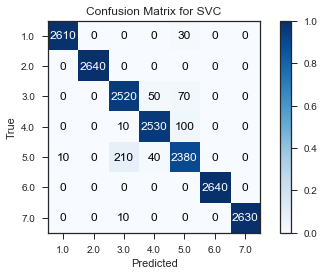

In [37]:
val_conf_SVM_RBF, val_scores_SVM_RBF, val_time_SVM_RBF = classify(cancer_prepared, np.array(df['y']),
                                                             classifiers['SVM'](kernel='rbf', 
                                                                                C=grid_search_RBF.best_params_['C'],
                                                                        gamma = grid_search_RBF.best_params_['gamma']))

print('The average training time is %0.6f seconds'%val_time_SVM_RBF.mean())

The test accuracy is 0.9589
              precision    recall  f1-score   support

           1       0.98      1.00      0.99        65
           2       1.00      1.00      1.00        66
           3       0.94      0.87      0.91        71
           4       0.94      0.97      0.95        64
           5       0.85      0.88      0.86        64
           6       1.00      1.00      1.00        66
           7       1.00      1.00      1.00        66

    accuracy                           0.96       462
   macro avg       0.96      0.96      0.96       462
weighted avg       0.96      0.96      0.96       462



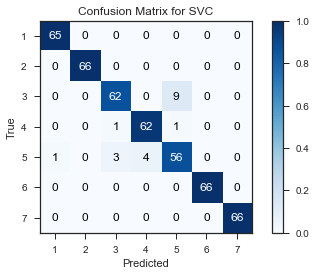

In [38]:
#  Fitting on the training data
SVM_RBF = classifiers['SVM'](kernel='rbf', 
                           C=grid_search_RBF.best_params_['C'], 
                          gamma = grid_search_RBF.best_params_['gamma'])
SVM_RBF.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_RBF.predict(scaled_test)
test_score_SVM_RBF = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_RBF)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_RBF)

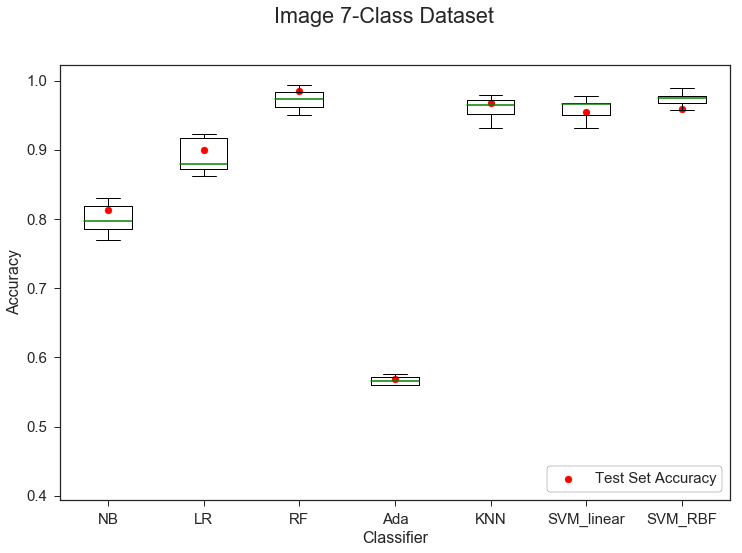

In [59]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
median_prop = dict(color='g', linewidth = 1.5)
fig = plt.figure(figsize=(12,8))
fig.suptitle('Image 7-Class Dataset')
ax = fig.add_subplot(111)
method_labels = ['NB','LR','RF','Ada','KNN','SVM_linear','SVM_RBF']
test_results = [test_score_NB, test_score_LR, test_score_RF, test_score_Ada, 
                test_score_KNN, test_score_SVM_L, test_score_SVM_RBF]
plt.boxplot([val_scores_NB, val_scores_LR, val_scores_RF, val_scores_Ada, 
             val_scores_KNN, val_scores_SVM_L_opt, val_scores_SVM_RBF], medianprops = median_prop)
ax.set_xticklabels(method_labels)
plt.scatter(x=range(1,8), y=test_results, color='r', label='Test Set Accuracy')
ax.legend(frameon=True, edgecolor='black', loc='lower right')
# ax.set_ylim([0.4,1])
ax.set_ylabel('Accuracy', fontsize = 16)
ax.set_xlabel('Classifier', fontsize = 16)
plt.show()


In [40]:
test_results

[0.8138528138528138,
 0.9004329004329005,
 0.9848484848484849,
 0.5692640692640693,
 0.9675324675324676,
 0.9545454545454546,
 0.9588744588744589]

In [41]:
import pandas as pd
pd.DataFrame([0.7922077922077922,
 0.8917748917748918,
 0.9761904761904762,
 0.5692640692640693,
 0.9632034632034632,
 0.9502164502164502,
 0.9632034632034632])

0
0  0.792208
1  0.891775
2  0.976190
3  0.569264
4  0.963203
5  0.950216
6  0.963203

In [42]:
val_image = [val_scores_NB, val_scores_LR, val_scores_RF, val_scores_Ada, 
             val_scores_KNN, val_scores_SVM_L_opt, val_scores_SVM_RBF]

In [43]:
%store -r val_cardio
%store -r val_lsvt

In [44]:
val_image_mean = np.mean(val_image, axis=1)
val_image_std = np.std(val_image,axis=1)

val_cardio_mean = np.mean(val_cardio, axis=1)
val_cardio_std = np.std(val_cardio,axis=1)

val_lsvt_mean = np.mean(val_lsvt, axis=1)
val_lsvt_std = np.std(val_lsvt,axis=1)

In [50]:
data_labels = ['Image', 'CTG', 'LSVT']

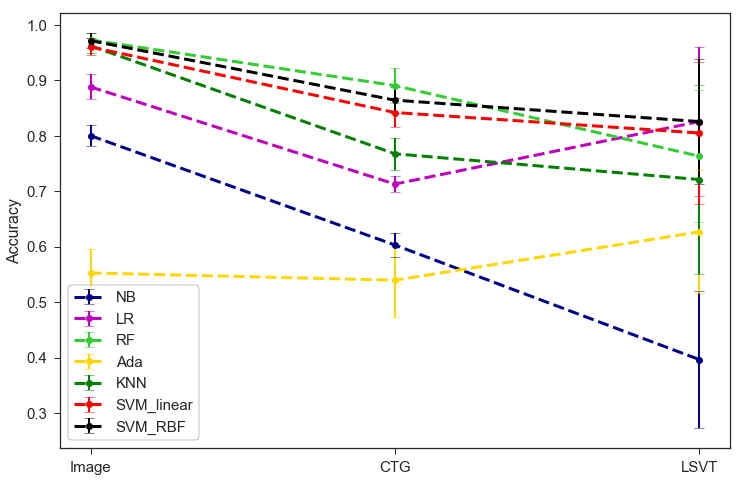

In [57]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_ylabel('Accuracy', fontsize = 16)

# linestyle = {"linestyle":"--", "linewidth":4, "markeredgewidth":5, "elinewidth":5, "capsize":10}
colours = ['darkblue','m','limegreen','gold','g','r','k']
for ii in range(7):
    ax.errorbar(
        data_labels,  # X
        [val_image_mean[ii],val_cardio_mean[ii], val_lsvt_mean[ii]],  # Y
        yerr=[val_image_std[ii],val_cardio_std[ii], val_lsvt_std[ii]],     # Y-errors
        label=method_labels[ii],
        color = colours[ii],
        fmt="o--", # format line like for plot()
        linewidth=3	,# width of plot line
        elinewidth=2,# width of error bar line
        capsize=5,     # cap length for error bar
        capthick=0.5,
        )


plt.legend(frameon=True, edgecolor = 'k', loc='lower left')
plt.show()